In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df_airline=pd.read_csv('D:\CDAC\Github\Machine_Learning_Tutorials\Arima\\airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

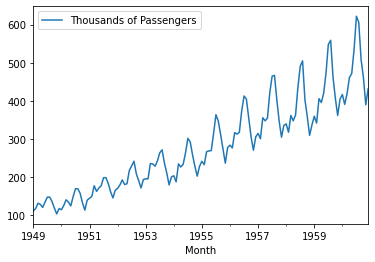

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060462
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699848
p- value: 0.054213290283827514
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468452
p- value: 2.732891850014516e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [25]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


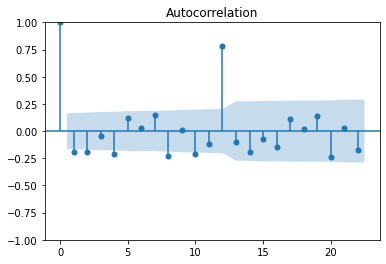

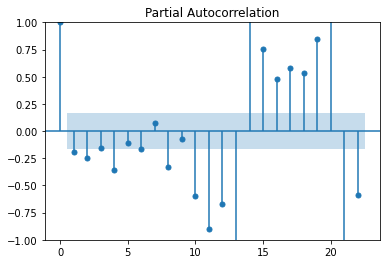

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())
pacf = plot_pacf(df_airline["Passengers Second Difference"].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


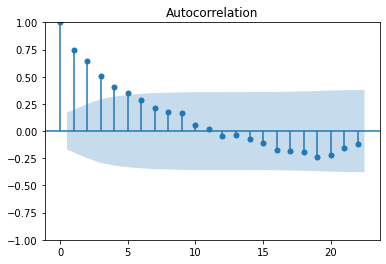

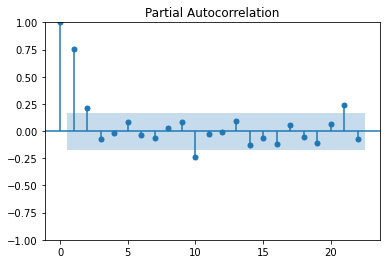

In [26]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


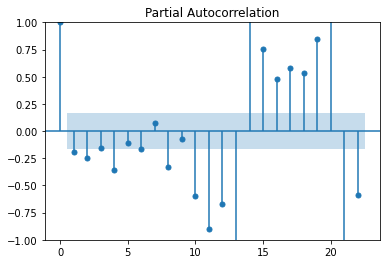

In [27]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [28]:
# pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [29]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]


In [33]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [34]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [35]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [36]:
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [37]:
## create a ARIMA model
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [40]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(16,2,6))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
model_Arima_fit=model_ARIMA.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(16, 2, 6)   Log Likelihood                -304.286
Date:                     Sat, 02 Jul 2022   AIC                            654.572
Time:                             18:11:56   BIC                            709.926
Sample:                         01-01-1949   HQIC                           676.796
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7027     36.043     -0.019      0.984     -71.345      69.940
ar.L2         -0.3543     35.468     -0.010      0.992     -69.871      69.163
ar.L3         -0.4064     22.323     -0.018      0.985     -44.158      43.345
ar.L4         -0.1351     19.622     -0.007      0.995     -38.593      38.323
ar.L5         -0.1883      9.328     -0.020      0.984     -18.470      18.094
ar.L6         -0.2066      8.724     -0.024      0.981     -17.305      16.892
ar.L7         -0.1653      9.314     -0.018      0.986     -18.421      18.090
ar.L8         -0.3030      7.969     -0.038      0.970     -15.922      15.316
ar.L9         -0.1807     12.609     -0.014      0.989     -24.895      24.533
ar.L10        -0.2467      9.509     -0.026      0.979     -18.884      18.391
ar.L11        -0.1329     10.969     -0.012      0.990     -21.631      21.366
ar.L12         0.6720      7.235      0.093      0.926     -13.508      14.853
ar.L13         0.5152     22.843      0.023      0.982     -44.257      45.287
ar.L14         0.0960     25.582      0.004      0.997     -50.044      50.236
ar.L15         0.2037     10.809      0.019      0.985     -20.981      21.388
ar.L16        -0.0629      9.793     -0.006      0.995     -19.258      19.132
ma.L1         -0.4377     36.070     -0.012      0.990     -71.135      70.259
ma.L2         -0.3963      5.777     -0.069      0.945     -11.719      10.927
ma.L3         -0.0773     16.463     -0.005      0.996     -32.344      32.189
ma.L4         -0.2683      8.247     -0.033      0.974     -16.432      15.896
ma.L5          0.2948     11.598      0.025      0.980     -22.436      23.026
ma.L6         -0.0682      7.866     -0.009      0.993     -15.486      15.349
sigma2        78.7551     18.025      4.369      0.000      43.427     114.083
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.96   Prob(JB):                         0.22
Heteroskedasticity (H):               1.95   Skew:                             0.47
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [44]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [45]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [46]:
pred

1956-01-01    286.785431
1956-02-01    279.363912
1956-03-01    299.298914
1956-04-01    306.859309
1956-05-01    308.316437
1956-06-01    354.472096
1956-07-01    399.013711
1956-08-01    379.588187
1956-09-01    346.821416
1956-10-01    311.667142
1956-11-01    279.949982
1956-12-01    313.023911
1957-01-01    325.760832
1957-02-01    312.126075
1957-03-01    329.535762
1957-04-01    338.242236
1957-05-01    343.956433
1957-06-01    387.107420
1957-07-01    431.108479
1957-08-01    408.723247
1957-09-01    378.790161
1957-10-01    346.969024
1957-11-01    319.662246
1957-12-01    347.116434
1958-01-01    361.137561
1958-02-01    344.705684
1958-03-01    357.628535
1958-04-01    370.075226
1958-05-01    377.213658
1958-06-01    419.871191
1958-07-01    460.636140
1958-08-01    438.771576
1958-09-01    408.855650
1958-10-01    382.831121
1958-11-01    357.530521
1958-12-01    381.696257
1959-01-01    394.874077
1959-02-01    377.521547
1959-03-01    385.740382
1959-04-01    401.935871


In [47]:
residuals

Month
1956-01-01     -2.785431
1956-02-01     -2.363912
1956-03-01     17.701086
1956-04-01      6.140691
1956-05-01      9.683563
1956-06-01     19.527904
1956-07-01     13.986289
1956-08-01     25.411813
1956-09-01      8.178584
1956-10-01     -5.667142
1956-11-01     -8.949982
1956-12-01     -7.023911
1957-01-01    -10.760832
1957-02-01    -11.126075
1957-03-01     26.464238
1957-04-01      9.757764
1957-05-01     11.043567
1957-06-01     34.892580
1957-07-01     33.891521
1957-08-01     58.276753
1957-09-01     25.209839
1957-10-01      0.030976
1957-11-01    -14.662246
1957-12-01    -11.116434
1958-01-01    -21.137561
1958-02-01    -26.705684
1958-03-01      4.371465
1958-04-01    -22.075226
1958-05-01    -14.213658
1958-06-01     15.128809
1958-07-01     30.363860
1958-08-01     66.228424
1958-09-01     -4.855650
1958-10-01    -23.831121
1958-11-01    -47.530521
1958-12-01    -44.696257
1959-01-01    -34.874077
1959-02-01    -35.521547
1959-03-01     20.259618
1959-04-01     -5.9

<AxesSubplot:ylabel='Density'>

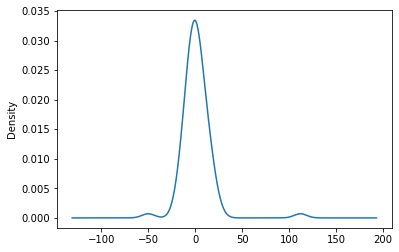

In [48]:
model_Arima_fit.resid.plot(kind='kde')

In [49]:
test_data['Predicted_ARIMA']=pred

C:\Users\shree\AppData\Local\Temp\ipykernel_11588\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

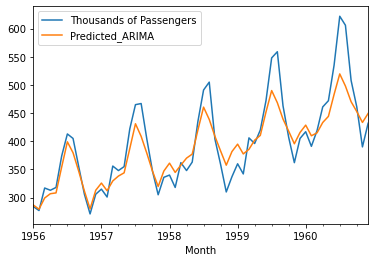

In [50]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


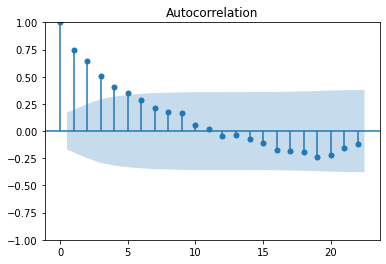

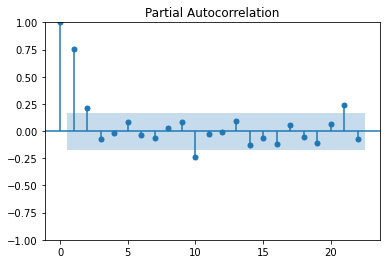

In [51]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [52]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [53]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,12,5),seasonal_order=(3,12,5,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
model_SARIMA_fit=model_SARIMA.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [55]:
model_SARIMA_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:431: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:467: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 12, 5)x(3, 12, 5, 12)   Log Likelihood                   0.000
Date:                              Sat, 02 Jul 2022   AIC                             34.000
Time:                                      18:16:15   BIC                                nan
Sample:                                  01-01-1949   HQIC                               nan
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan           0          -0
ar.L2               0         -0        nan        nan           0           0
ar.L3               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ma.L2               0         -0        nan        nan           0           0
ma.L3               0         -0        nan        nan           0           0
ma.L4               0         -0        nan        nan           0           0
ma.L5               0         -0        nan        nan           0           0
ar.S.L12           -0         -0        nan        nan           0          -0
ar.S.L24            0         -0        nan        nan           0           0
ar.S.L36            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
ma.S.L24            0         -0        nan        nan           0           0
ma.S.L36            0         -0        nan        nan           0           0
ma.S.L48            0         -0        nan        nan           0           0
ma.S.L60            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [56]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,498.050209
1960-09-01,508.0,-98.0,-82.0,45.0,470.254948
1960-10-01,461.0,-47.0,51.0,54.0,452.736878
1960-11-01,390.0,-71.0,-24.0,28.0,433.407460
1960-12-01,432.0,42.0,113.0,27.0,449.420107


In [57]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [58]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

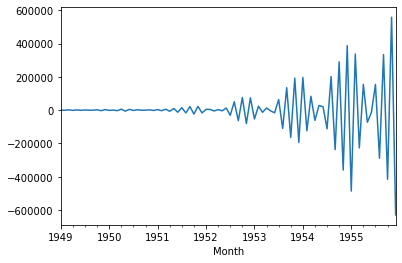

In [59]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

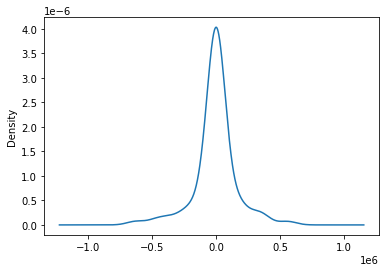

In [60]:
model_SARIMA_fit.resid.plot(kind='kde')

In [61]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\shree\AppData\Local\Temp\ipykernel_11588\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [62]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,286.785431,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,279.363912,NaN
1956-03-01,317.0,40.0,47.0,50.0,299.298914,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,306.859309,NaN
1956-05-01,318.0,5.0,9.0,48.0,308.316437,NaN
1956-06-01,374.0,56.0,51.0,59.0,354.472096,NaN
1956-07-01,413.0,39.0,-17.0,49.0,399.013711,-9.247418e+09
1956-08-01,405.0,-8.0,-47.0,58.0,379.588187,-2.328760e+10
1956-09-01,355.0,-50.0,-42.0,43.0,346.821416,-5.429909e+10


<AxesSubplot:xlabel='Month'>

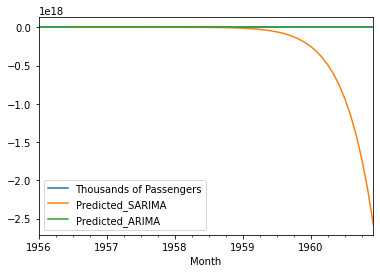

In [63]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()